In [1]:
from diffusers import StableDiffusionPipeline
from diffusers import StableDiffusionXLPipeline
from peft import get_peft_model, LoraConfig
import torch


/root/stable_diffusion/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Pretrained Stable Diffusion Model

In [2]:

# Load the base SDXL model
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to("cuda")




Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  9.75it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 14.00 MiB. GPU 0 has a total capacity of 23.57 GiB of which 6.56 MiB is free. Process 3396791 has 22.27 GiB memory in use. Process 3505793 has 1.28 GiB memory in use. Of the allocated memory 987.69 MiB is allocated by PyTorch, and 66.31 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

## Configure LoRA for Fine-Tuning

In [ ]:
# Load the IKEA instructions LoRA
pipe.load_lora_weights(
    "ostris/ikea-instructions-lora-sdxl",
    adapter_name="ikea"
)

# Activate the adapter
pipe.set_adapters("ikea")


/root/stable_diffusion/venv/lib/python3.10/site-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
No LoRA keys associated to CLIPTextModelWithProjection found with the prefix='text_encoder_2'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModelWithProjection related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new

100%|██████████| 50/50 [00:16<00:00,  3.09it/s]


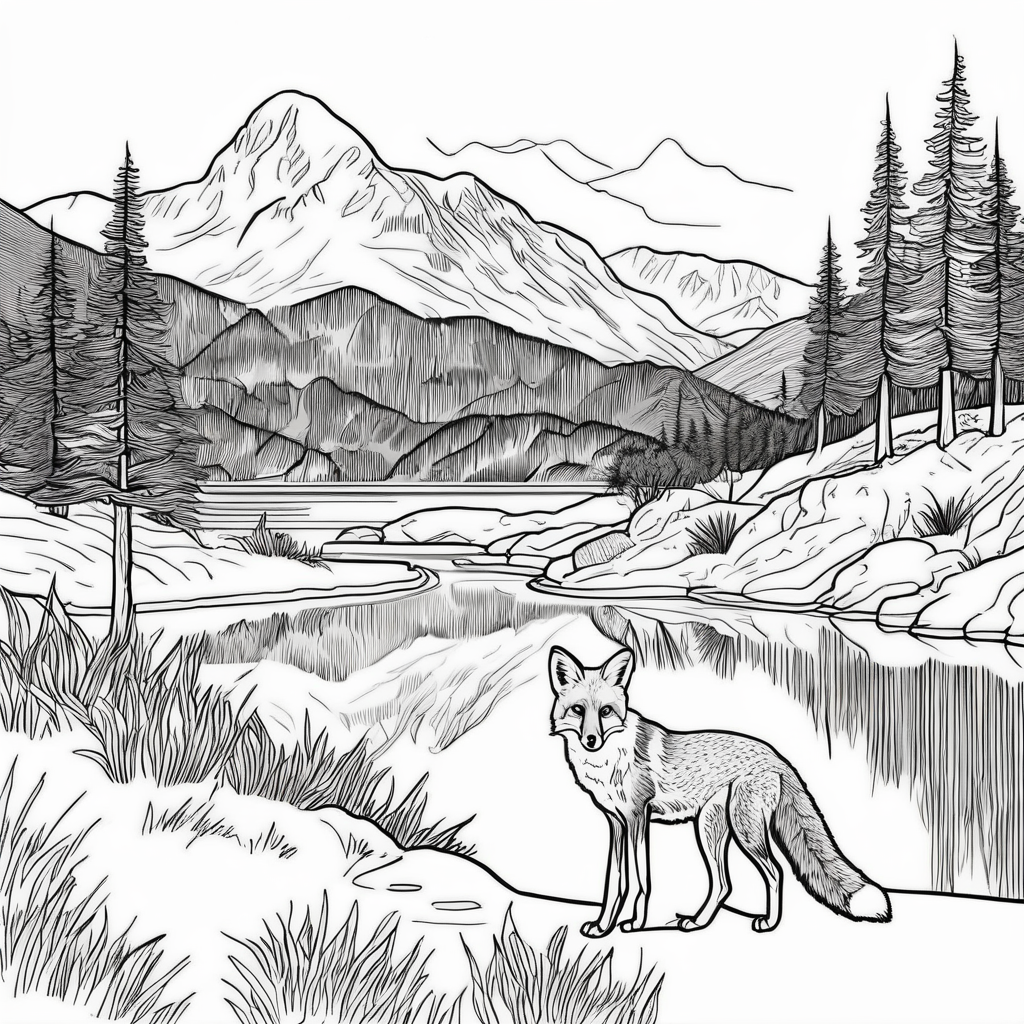

In [ ]:
prompt = (
    "A scientific isometric infographic showing a vertically exploded view of five layered structures, "
    "spaced evenly top to bottom on a neutral grey background (RGB #CCCCCC) with a light grey isometric grid overlay. "

    "Top layer: A large, high-resolution, photo-realistic green lotus leaf in isometric view, with visible veins "
    "and a glossy water droplet on top showing a high contact angle above 150°. No background, no text, isolated on the grey grid. "

    "Second layer: Dense vertical nanohairs drawn in clean black architectural linework, standing upright like tightly packed bristles. "
    "No shading or color. "

    "Third layer: Fine crystalline texture resembling wax particles, shown in black line drawing only. "

    "Fourth layer: Dome-shaped papillae, like smooth micro-bumps or bubble wrap. Monochrome black line drawing, no shading. "

    "Fifth layer: Grid-like surface supporting a circular water droplet floating above, representing a layer of trapped air. "
    "Architectural linework only. "

    "Include: A vertical white ruler on the right with black tick marks spaced logarithmically for 100 nm, 200 nm, 1 µm, and 5 µm. "
    "Thin vertical black lines connect all five layers along their center axis. "

    "Do not include any text, labels, captions, numbers, or shadows. "
    "All layers except the top lotus leaf must be in clean monochrome technical drawing style."
)


image_4=pipe(prompt).images[0]
image_4